In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading, cleaning, wrangling data for all stars + batters 
all_star_df = pd.read_csv("AllstarFull.csv")
batting_df = pd.read_csv("Batting.csv")
players_df = pd.read_csv("People.csv")
stats_df = pd.read_csv("jeffbagwell_war_historical_2023.csv", encoding='latin-1')
all_star_df = all_star_df[all_star_df['yearID'] >= 2018]
batting_df = batting_df[((batting_df['yearID'] >= 2018)&(batting_df['stint']==1))]
stats_df = stats_df[((stats_df['year_ID']>=2018)&(stats_df['stint_ID']==1))]
batting_df['PA'] = batting_df['AB'] + batting_df['BB'] + batting_df['HBP'] + batting_df['SF'] + batting_df['SH']
batting_df['AVG'] = batting_df['H'] / batting_df['AB']
batting_df['OBP'] = (batting_df['H'] + batting_df['BB'] + batting_df['HBP']) / (batting_df['AB'] + batting_df['BB'] + batting_df['HBP'] + batting_df['SF'])
batting_columns = ['playerID', 'yearID','stint', 'teamID','PA','AB', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'OBP']
all_star_columns= ['playerID', 'yearID', 'teamID', 'GP']
players_column = ['nameFirst', 'nameLast','playerID']
batting_df = batting_df[batting_columns]
all_star_df = all_star_df[all_star_columns]
players_df = players_df[players_column]
batting_df
stats_df[stats_df['key_bbref']=='abreubo01']
stats_df['OPS'] = stats_df['OBP_plus']+stats_df['SLG_plus']
print(stats_df['player_name'])

64        Fernando Abad
65        Fernando Abad
74          Cory Abbott
75          Cory Abbott
199           CJ Abrams
              ...      
112611      Mike Zunino
112612      Mike Zunino
112613      Mike Zunino
112614      Mike Zunino
112615      Mike Zunino
Name: player_name, Length: 7081, dtype: object


In [3]:
all_star_batters = pd.merge(batting_df, all_star_df, left_on=['playerID', 'yearID'], right_on=['playerID','yearID'], how='left')
print(all_star_batters)
all_star_batters = pd.merge(all_star_batters, players_df, on='playerID', how='left')
print(all_star_batters)
all_star_batters = all_star_batters.rename(columns={"teamID_x":'teamID'})
all_star_batters = all_star_batters.drop('teamID_y',axis=1)
print(all_star_batters)
all_star_batters = pd.merge(all_star_batters, stats_df,  how='right', left_on=['playerID','yearID','teamID'], right_on = ['key_bbref','year_ID','team_ID']).drop_duplicates()
print(all_star_batters)
all_star_batters = all_star_batters[all_star_batters['year_ID']!=2020]
print(all_star_batters[all_star_batters['playerID']=='sotoju01'])



       playerID  yearID  stint teamID_x     PA   AB    H  2B  3B  HR   RBI  \
0     abreujo02    2018      1      CHA  553.0  499  132  36   1  22  78.0   
1     acunaro01    2018      1      ATL  487.0  433  127  26   4  26  64.0   
2     adamewi01    2018      1      TBA  323.0  288   80   7   0  10  34.0   
3      adamja01    2018      1      KCA    0.0    0    0   0   0   0   0.0   
4     adamsau02    2018      1      WAS    0.0    0    0   0   0   0   0.0   
...         ...     ...    ...      ...    ...  ...  ...  ..  ..  ..   ...   
7077  zerpaan01    2022      1      KCA    0.0    0    0   0   0   0   0.0   
7078  zeuchtj01    2022      1      CIN    0.0    0    0   0   0   0   0.0   
7079  zimmebr01    2022      1      TOR   87.0   76    8   4   0   2   3.0   
7080  zimmebr02    2022      1      BAL    0.0    0    0   0   0   0   0.0   
7081  zuninmi01    2022      1      TBA  123.0  115   17   3   0   5  16.0   

      BB     SO       AVG       OBP teamID_y   GP  
0     37  1

[4 rows x 97 columns]


In [4]:
all_star_batters['AS_selection'] = all_star_batters['GP'].replace(0,1)
print(all_star_batters['AS_selection'])
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].fillna(0)
print(all_star_batters['AS_selection'])
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].replace(0,False)
print(all_star_batters['AS_selection'])
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].replace(1,True)
print(all_star_batters['AS_selection'])
all_star_batters[((all_star_batters['yearID']==2022)&(all_star_batters['AS_selection']==True))]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7076    NaN
7077    NaN
7078    NaN
7080    1.0
7081    NaN
Name: AS_selection, Length: 5792, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7076    0.0
7077    0.0
7078    0.0
7080    1.0
7081    0.0
Name: AS_selection, Length: 5792, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
7076    False
7077    False
7078    False
7080        1
7081    False
Name: AS_selection, Length: 5792, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
7076    False
7077    False
7078    False
7080     True
7081    False
Name: AS_selection, Length: 5792, dtype: bool


,playerID,yearID,stint,teamID,PA,AB,H,2B,3B,HR,...,gms_DH,gms_PH,gms_PR,prev_tm,arrived,departed,next_tm,salary,OPS,AS_selection
23,acunaro01,2022.0,1.0,ATL,533.0,467.0,124.0,24.0,0.0,15.0,...,27.0,4.0,0.0,---,2018,2022,---,15000000.0,216.0,True
104,alcansa01,2022.0,1.0,MIA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SLN,2018,2022,---,3800000.0,NaN,True
174,alonspe01,2022.0,1.0,NYN,685.0,597.0,162.0,27.0,0.0,40.0,...,27.0,0.0,0.0,---,2019,2022,---,7400000.0,242.0,True
187,altuvjo01,2022.0,1.0,HOU,604.0,527.0,158.0,39.0,0.0,28.0,...,2.0,4.0,0.0,---,2011,2022,---,29000000.0,261.0,True
207,alvaryo01,2022.0,1.0,HOU,561.0,470.0,144.0,29.0,2.0,37.0,...,77.0,2.0,0.0,---,2019,2022,---,764600.0,287.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,tuckeky01,2022.0,1.0,HOU,606.0,544.0,140.0,28.0,1.0,30.0,...,3.0,2.0,0.0,---,2018,2022,---,NaN,229.0,True
6482,turnetr01,2022.0,1.0,LAN,706.0,652.0,194.0,39.0,4.0,21.0,...,0.0,0.0,0.0,WAS,2021,2022,---,21000000.0,226.0,True
6540,valdefr01,2022.0,1.0,HOU,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,---,2018,2022,---,3000000.0,NaN,True
6609,verlaju01,2022.0,1.0,HOU,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,DET,2017,2022,---,25000000.0,NaN,True


In [5]:
 all_star_batters['AS_selection'].value_counts(dropna = False)

False    5491
True      301
Name: AS_selection, dtype: int64

0       Fernando Abad
1       Fernando Abad
2         Cory Abbott
3         Cory Abbott
4           CJ Abrams
            ...      
7076      Tyler Zuber
7077      Mike Zunino
7078      Mike Zunino
7080      Mike Zunino
7081      Mike Zunino
Name: player_name, Length: 5792, dtype: object


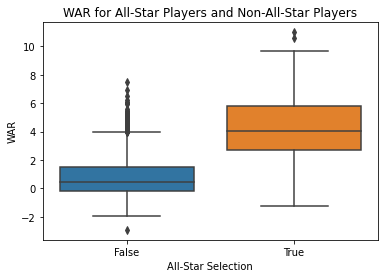

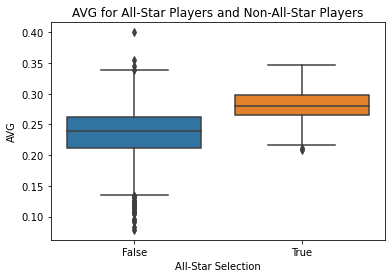

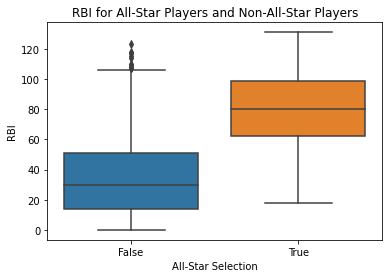

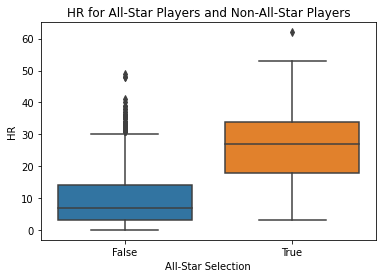

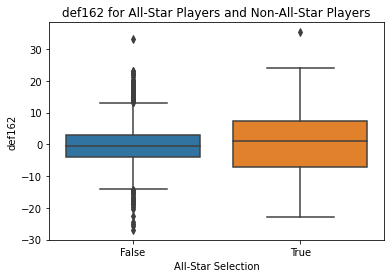

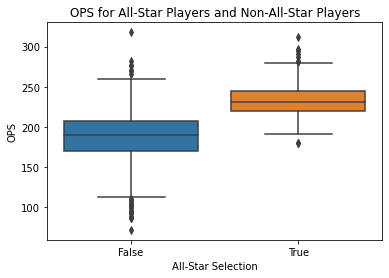

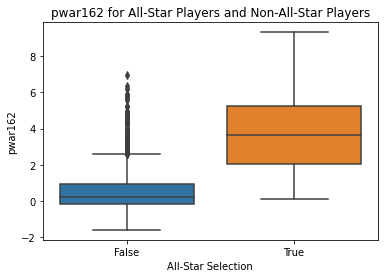

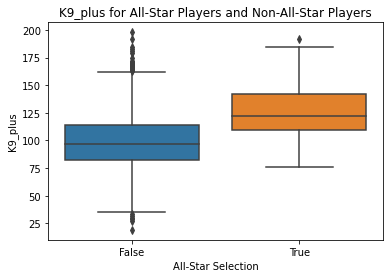

Series([], Name: player_name, dtype: object)


In [6]:
print(all_star_batters['player_name'])
all_star_pitchers = all_star_batters[all_star_batters['is_P']=='Y']
all_star_batters = all_star_batters[all_star_batters['is_P']=='N']
all_star_batters_min = all_star_batters[((all_star_batters['PA']>50)|(all_star_batters['AS_selection']==1)|((all_star_batters['is_P']=='Y')&(all_star_batters['innings']>=10)))]
all_star_batters_min = all_star_batters_min.drop('GP',axis=1)
all_star_pitchers_min = all_star_pitchers[((all_star_pitchers['PA']>50)|(all_star_pitchers['AS_selection']==1)|((all_star_pitchers['is_P']=='Y')&(all_star_pitchers['innings']>=10)))]
all_star_pitchers_min = all_star_pitchers_min.drop('GP',axis=1)
sns.boxplot(x='AS_selection', y='bwar162', data=all_star_batters_min)
plt.title('WAR for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('WAR')
plt.show()
sns.boxplot(x='AS_selection', y='AVG', data=all_star_batters_min)
plt.title('AVG for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('AVG')
plt.show()
sns.boxplot(x='AS_selection', y='RBI', data=all_star_batters_min)
plt.title('RBI for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('RBI')
plt.show()
sns.boxplot(x='AS_selection', y='HR', data=all_star_batters_min)
plt.title('HR for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('HR')
plt.show()
sns.boxplot(x='AS_selection', y='def162', data=all_star_batters_min)
plt.title('def162 for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('def162')
plt.show()
sns.boxplot(x='AS_selection', y='OPS', data=all_star_batters_min)
plt.title('OPS for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('OPS')
plt.show()
sns.boxplot(x='AS_selection', y='pwar162', data= all_star_pitchers_min)
plt.title('pwar162 for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('pwar162')
plt.show()
sns.boxplot(x='AS_selection', y='K9_plus', data= all_star_pitchers_min)
plt.title('K9_plus for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('K9_plus')
plt.show()
print(all_star_batters_min[((all_star_batters_min['PA']<75)&(all_star_batters_min['AS_selection']==True))]['player_name'])

## Relationship between Plate Appearances and All-Star Selection
Median - higher. 
Distribution - higher  (provide explanation + analyze) 


In [7]:
#Most all star selections since 2012

all_star_counts = all_star_batters.groupby(['playerID','nameFirst', 'nameLast'])['AS_selection'].sum().reset_index()
most_as = all_star_counts.sort_values(by = 'AS_selection', ascending = False)
most_as.head(20)

,playerID,nameFirst,nameLast,AS_selection
89,bettsmo01,Mookie,Betts,4
593,martijd02,J. D.,Martinez,4
318,freemfr01,Freddie,Freeman,4
991,troutmi01,Mike,Trout,4
44,arenano01,Nolan,Arenado,4
570,machama01,Manny,Machado,3
492,judgeaa01,Aaron,Judge,3
794,realmjt01,J. T.,Realmuto,3
28,altuvjo01,Jose,Altuve,3
786,ramirjo01,Jose,Ramirez,3


In [8]:
#all stars PA (ignore the pitchers -- outliers)
top_players = most_as.nlargest(20, 'AS_selection')
top_players = pd.merge(top_players, batting_df[['playerID', 'PA']], on='playerID')
#top_players = top_players.groupby('playerID', as_index = False)['PA'].sum()
top_players = top_players.sort_values(by = 'PA', ascending = False)
top_players

,playerID,nameFirst,nameLast,AS_selection,PA
66,acunaro01,Ronald,Acuna,3,712.0
14,freemfr01,Freddie,Freeman,4,708.0
10,freemfr01,Freddie,Freeman,4,707.0
1,bettsmo01,Mookie,Betts,4,706.0
51,bogaexa01,Xander,Bogaerts,3,698.0
...,...,...,...,...,...
82,ohtansh01,Shohei,Ohtani,2,175.0
86,perezsa02,Salvador,Perez,2,156.0
94,molinya01,Yadier,Molina,2,156.0
18,troutmi01,Mike,Trout,4,146.0


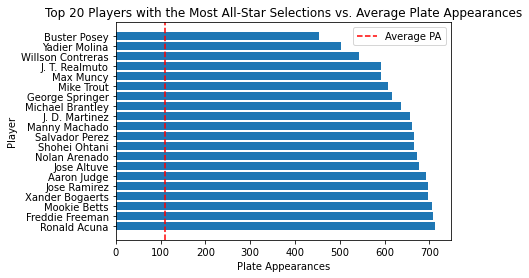

In [9]:
avg_pa = batting_df['PA'].mean()
# Create a horizontal bar chart comparing the top 20 players' PAs against the average PA
plt.barh(top_players['nameFirst'] + ' ' + top_players['nameLast'], top_players['PA'])
plt.axvline(x=avg_pa, color='red', linestyle='--')
plt.xlabel('Plate Appearances')
plt.ylabel('Player')
plt.title('Top 20 Players with the Most All-Star Selections vs. Average Plate Appearances')
plt.legend(['Average PA'])
plt.show()

In [10]:
# all_star_counts['AS_selection'] = all_star_counts['AS_selection'].astype(int)
# plt.hist(all_star_counts['AS_selection'], bins=range(0, max(all_star_counts['AS_selection'])+2, 1))
# plt.title('Distribution of All-Star Selections')
# plt.xlabel('Number of All-Star Selections')
# plt.ylabel('Count')
# plt.show()

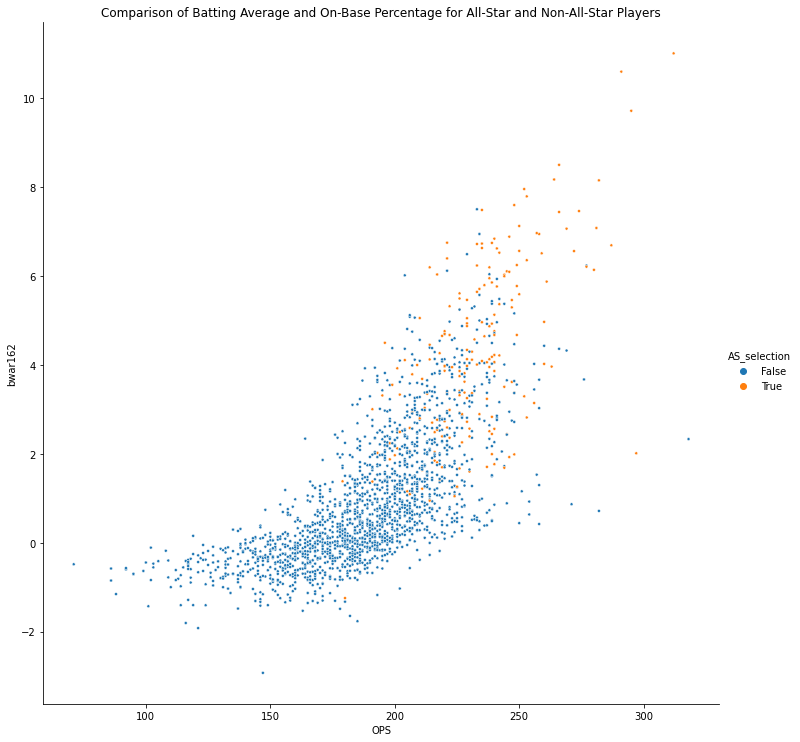

       playerID  yearID  stint teamID     PA     AB      H    2B   3B    HR  \
4632  ohtansh01  2022.0    1.0    LAA  666.0  586.0  160.0  30.0  6.0  34.0   

      ...  gms_DH  gms_PH  gms_PR  prev_tm  arrived departed next_tm  \
4632  ...   153.0     4.0     0.0      ---     2018     2022     ---   

         salary    OPS AS_selection  
4632  5500000.0  247.0         True  

[1 rows x 97 columns]


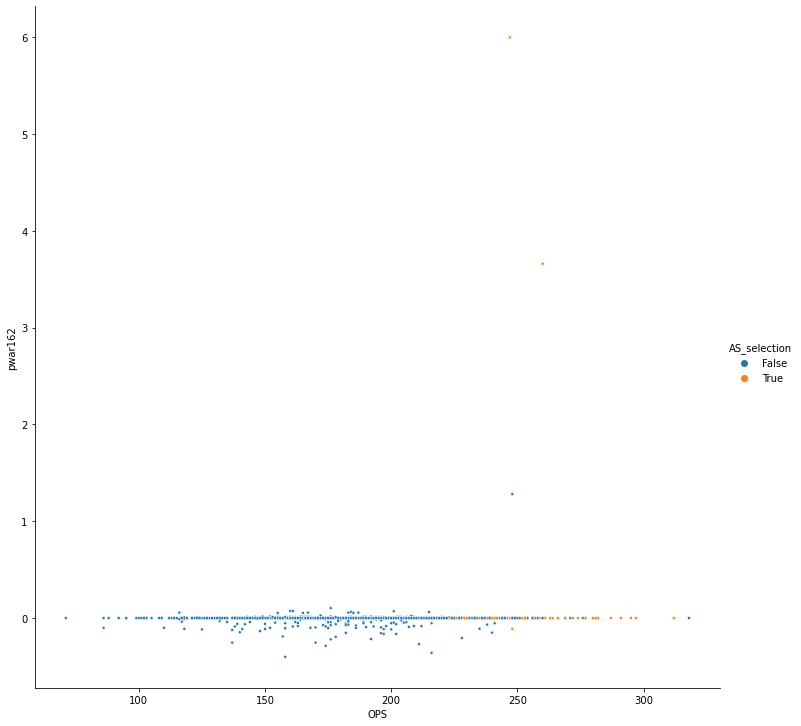

In [11]:
#AVG AND OBP against All stars and non all stars -- visualize here. 
sns.relplot(x='OPS', y='bwar162', hue='AS_selection', data=all_star_batters_min[all_star_batters_min['is_P']=='N'],marker = '.',height=10)
plt.title('Comparison of Batting Average and On-Base Percentage for All-Star and Non-All-Star Players')
plt.show()
sns.relplot(x='OPS', y='pwar162', hue='AS_selection', data=all_star_batters_min,marker = '.',height=10)
print(all_star_batters_min[all_star_batters_min['pwar162'] == max(all_star_batters_min['pwar162'])])

In [12]:
try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ != '1.2.1' and sklearn.__version__ != '1.2.2'): #update for latest otter version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn

1.2.2


Optimal n_neighors: 24
Accuracy on testing data: 0.9190751445086706

                  AS_selection  AS_prediction
player_name                                  
CJ Abrams                False          False
José Abreu               False          False
Ronald Acuna Jr.          True          False
Willy Adames             False          False
Riley Adams              False          False
...                        ...            ...
Christian Yelich         False          False
Juan Yepez               False          False
Seby Zavala              False          False
Bradley Zimmer           False          False
Mike Zunino              False          False

[519 rows x 2 columns]
                       AS_selection  AS_prediction
player_name                                       
Ronald Acuna Jr.               True          False
Jose Altuve                    True          False
Yordan Alvarez                 True          False
Tim Anderson                   True          False
Lui

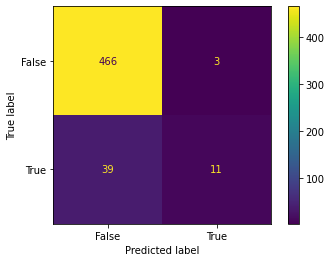

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
train = all_star_batters_min[all_star_batters_min['year_ID'] != 2022].fillna(0)
test = all_star_batters_min[all_star_batters_min['year_ID'] == 2022].fillna(0)
#all_star_batters_min['OPS'].fillna(0, inplace = True)
#all_star_batters_min['bwar162'].fillna(0, inplace = True)
#all_star_batters_min['wRC_plus'].fillna(0, inplace = True)
#all_star_batters_min['AVG_plus'].fillna(0, inplace = True)
var = ['bwar162','OPS']
var=['AVG','RBI','HR']
tar = 'AS_selection'
train_data = train[var]
test_data = test[var]
train_target = train[tar]
test_target = test[tar]
#data = data.set_index(all_star_batters_min['player_name'])
#target = all_star_batters_min['AS_selection']
train_index = train['player_name']
target_index = test['player_name']
#train_data, test_data, train_target, test_target, train_index, target_index = train_test_split(
#    data, target, index, test_size=0.3, random_state=2)
# Write your code for question 4 here
params_to_try = {'n_neighbors': range(2,30)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = params_to_try,scoring = 'precision_micro')
knn_search.fit(X=train_data,y=train_target)
n = int(knn_search.best_params_.get('n_neighbors')) # int: n_neighbors
knn_model = KNeighborsClassifier(n_neighbors = n)
knn_model.fit(X=train_data,y=train_target)
predict = knn_model.predict(test_data)
predict = pd.Series(predict)
score = float(accuracy_score(test_target,predict))
predict.reset_index(drop=True,inplace=True)
test_target.reset_index(drop=True,inplace=True)
target_index.reset_index(drop=True,inplace=True)
print("Optimal n_neighors:", n)
print("Accuracy on testing data:", score)
print()
check = pd.concat([test_target,predict],axis=1,ignore_index=True)
check = check.set_index(target_index)
check.columns = ['AS_selection','AS_prediction']
check_diff = check[check['AS_selection']!=check['AS_prediction']]
pd.options.display.max_rows = 100
print(check)
print(check_diff)
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,knn_model.predict(test_data)),display_labels=knn_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

50


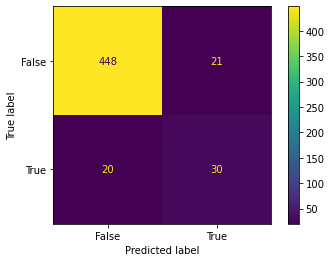

Accuracy on testing data: 0.9210019267822736
Precision on testing data: 0.5882352941176471
Recall on testing data: 0.6
f1 score on testing data: 0.5940594059405941


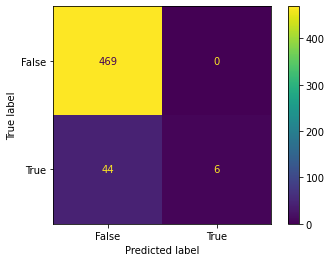

Accuracy on testing data: 0.9152215799614644
Precision on testing data: 1.0
Recall on testing data: 0.12
f1 score on testing data: 0.21428571428571425


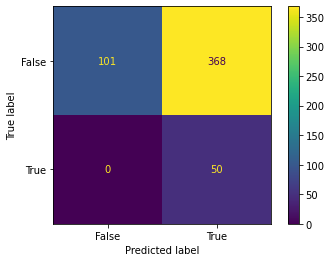

Accuracy on testing data: 0.2909441233140655
Precision on testing data: 0.11961722488038277
Recall on testing data: 1.0
f1 score on testing data: 0.21367521367521367


In [38]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
train = all_star_batters_min[all_star_batters_min['year_ID'] != 2022].fillna(-10000)
test = all_star_batters_min[all_star_batters_min['year_ID'] == 2022].fillna(-10000)
print(len(test[test['AS_selection']==1]))
#all_star_batters_min['OPS'].fillna(0, inplace = True)
#all_star_batters_min['bwar162'].fillna(0, inplace = True)
#all_star_batters_min['wRC_plus'].fillna(0, inplace = True)
#all_star_batters_min['AVG_plus'].fillna(0, inplace = True)
var=['AVG','RBI','HR','def162','OPS']
tar = 'AS_selection'
train_data = train[var]
test_data = test[var]
train_target = train[tar]
test_target = test[tar]
#data = data.set_index(all_star_batters_min['player_name'])
#target = all_star_batters_min['AS_selection']
train_index = train['player_name']
target_index = test['player_name']

#num=0
#maxscore = 0
#while(num<1):
#    num=num+0.01
#    linear_model = LogisticRegression(class_weight={0:num,1:1-num},max_iter=10000)
#    linear_model.fit(X=train_data,y=train_target)
#    predict = linear_model.predict(test_data)
#    predict = pd.Series(predict)
#    score = metrics.recall_score(test_target,predict,pos_label=1)
#    if(score>maxscore):
#        maxscore=score
#        bnum = num
linear_model = LogisticRegression(class_weight={0:0.26,1:0.74},max_iter=100000)
linear_model.fit(X=train_data,y=train_target)
predict = linear_model.predict(test_data)
predict = pd.Series(predict)
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,linear_model.predict(test_data)),display_labels=linear_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
ascore = float(metrics.accuracy_score(test_target,predict))
pscore = float(metrics.precision_score(test_target,predict))
rscore = float(metrics.recall_score(test_target,predict))
fscore = float(metrics.f1_score(test_target,predict))
print("Accuracy on testing data:", ascore)
print("Precision on testing data:", pscore)
print("Recall on testing data:", rscore)
print("f1 score on testing data:", fscore)
linear_model = LogisticRegression(class_weight={0:0.87,1:0.13},max_iter=100000)
linear_model.fit(X=train_data,y=train_target)
predict = linear_model.predict(test_data)
predict = pd.Series(predict)
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,linear_model.predict(test_data)),display_labels=linear_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
ascore = float(metrics.accuracy_score(test_target,predict))
pscore = float(metrics.precision_score(test_target,predict))
rscore = float(metrics.recall_score(test_target,predict))
fscore = float(metrics.f1_score(test_target,predict))
print("Accuracy on testing data:", ascore)
print("Precision on testing data:", pscore)
print("Recall on testing data:", rscore)
print("f1 score on testing data:", fscore)
linear_model = LogisticRegression(class_weight={0:0.00001,1:0.99999},max_iter=100000)
linear_model.fit(X=train_data,y=train_target)
predict = linear_model.predict(test_data)
predict = pd.Series(predict)
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,linear_model.predict(test_data)),display_labels=linear_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
ascore = float(metrics.accuracy_score(test_target,predict))
pscore = float(metrics.precision_score(test_target,predict))
rscore = float(metrics.recall_score(test_target,predict))
fscore = float(metrics.f1_score(test_target,predict))
print("Accuracy on testing data:", ascore)
print("Precision on testing data:", pscore)
print("Recall on testing data:", rscore)
print("f1 score on testing data:", fscore)

In [15]:
exp = all_star_batters_min[all_star_batters_min['AS_selection']==1]
print(exp[exp['OPS']<min(exp['OPS'])+10][['player_name','is_P']])

         player_name is_P
949   Miguel Cabrera    N
4282   Yadier Molina    N


26


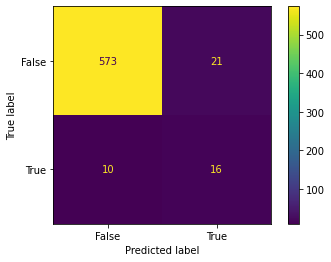

Accuracy on testing data: 0.95
Precision on testing data: 0.43243243243243246
Recall on testing data: 0.6153846153846154
f1 score on testing data: 0.5079365079365079


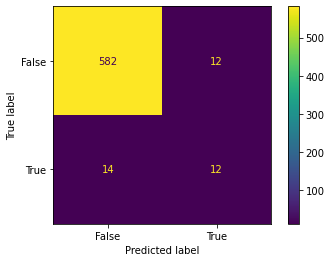

Accuracy on testing data: 0.9580645161290322
Precision on testing data: 0.5
Recall on testing data: 0.46153846153846156
f1 score on testing data: 0.48000000000000004


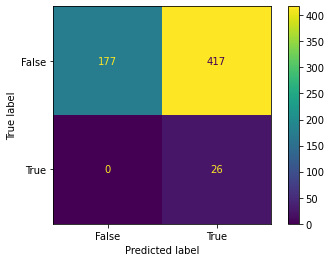

Accuracy on testing data: 0.32741935483870965
Precision on testing data: 0.05869074492099323
Recall on testing data: 1.0
f1 score on testing data: 0.11087420042643924


In [37]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
train = all_star_pitchers_min[all_star_pitchers_min['year_ID'] != 2022].fillna(-10000)
test = all_star_pitchers_min[all_star_pitchers_min['year_ID'] == 2022].fillna(-10000)
print(len(test[test['AS_selection']==1]))
#all_star_batters_min['OPS'].fillna(0, inplace = True)
#all_star_batters_min['bwar162'].fillna(0, inplace = True)
#all_star_batters_min['wRC_plus'].fillna(0, inplace = True)
#all_star_batters_min['AVG_plus'].fillna(0, inplace = True)
var=['pwar162','K9_plus']
tar = 'AS_selection'
train_data = train[var]
test_data = test[var]
train_target = train[tar]
test_target = test[tar]
#data = data.set_index(all_star_batters_min['player_name'])
#target = all_star_batters_min['AS_selection']
train_index = train['player_name']
target_index = test['player_name']

#num=0
#maxscore = 0
#while(num<1):
#    num=num+0.01
#    linear_model = LogisticRegression(class_weight={0:num,1:1-num},max_iter=10000)
#    linear_model.fit(X=train_data,y=train_target)
#    predict = linear_model.predict(test_data)
#    predict = pd.Series(predict)
#    score = metrics.precision_score(test_target,predict,pos_label=1)
#   if(score>maxscore):
#        maxscore=score
#        bnum = num
linear_model = LogisticRegression(class_weight={0:0.23,1:0.77},max_iter=10000)
linear_model.fit(X=train_data,y=train_target)
predict = linear_model.predict(test_data)
predict = pd.Series(predict)
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,linear_model.predict(test_data)),display_labels=linear_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
ascore = float(metrics.accuracy_score(test_target,predict))
pscore = float(metrics.precision_score(test_target,predict))
rscore = float(metrics.recall_score(test_target,predict))
fscore = float(metrics.f1_score(test_target,predict))
print("Accuracy on testing data:", ascore)
print("Precision on testing data:", pscore)
print("Recall on testing data:", rscore)
print("f1 score on testing data:", fscore)
linear_model = LogisticRegression(class_weight={0:0.36,1:0.64},max_iter=10000)
linear_model.fit(X=train_data,y=train_target)
predict = linear_model.predict(test_data)
predict = pd.Series(predict)
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,linear_model.predict(test_data)),display_labels=linear_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
ascore = float(metrics.accuracy_score(test_target,predict))
pscore = float(metrics.precision_score(test_target,predict))
rscore = float(metrics.recall_score(test_target,predict))
fscore = float(metrics.f1_score(test_target,predict))
print("Accuracy on testing data:", ascore)
print("Precision on testing data:", pscore)
print("Recall on testing data:", rscore)
print("f1 score on testing data:", fscore)
linear_model = LogisticRegression(class_weight={0:0.001,1:0.999},max_iter=10000)
linear_model.fit(X=train_data,y=train_target)
predict = linear_model.predict(test_data)
predict = pd.Series(predict)
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,linear_model.predict(test_data)),display_labels=linear_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
ascore = float(metrics.accuracy_score(test_target,predict))
pscore = float(metrics.precision_score(test_target,predict))
rscore = float(metrics.recall_score(test_target,predict))
fscore = float(metrics.f1_score(test_target,predict))
print("Accuracy on testing data:", ascore)
print("Precision on testing data:", pscore)
print("Recall on testing data:", rscore)
print("f1 score on testing data:", fscore)